In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 95.2 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import autokeras as ak 

In [24]:
#write your code here, import and load dataset.
(dataTrain, dataTest), info = tfds.load('fashion_mnist', split=['train', 'test'], with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHPYIBG/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHPYIBG/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [25]:
#your code here.
#print shape and length of your train,test iamges and their labels

print("Shape of training and Test Images {}".format(info.features['image'].shape))
print("Shape of labels {}".format(info.features['label'].shape))
print("Elements in the training set= {}".format(info.splits['train'].num_examples))
print("Elements in the test set= {}".format(info.splits['test'].num_examples))


Shape of training and Test Images (28, 28, 1)
Shape of labels ()
Elements in the training set= 60000
Elements in the test set= 10000


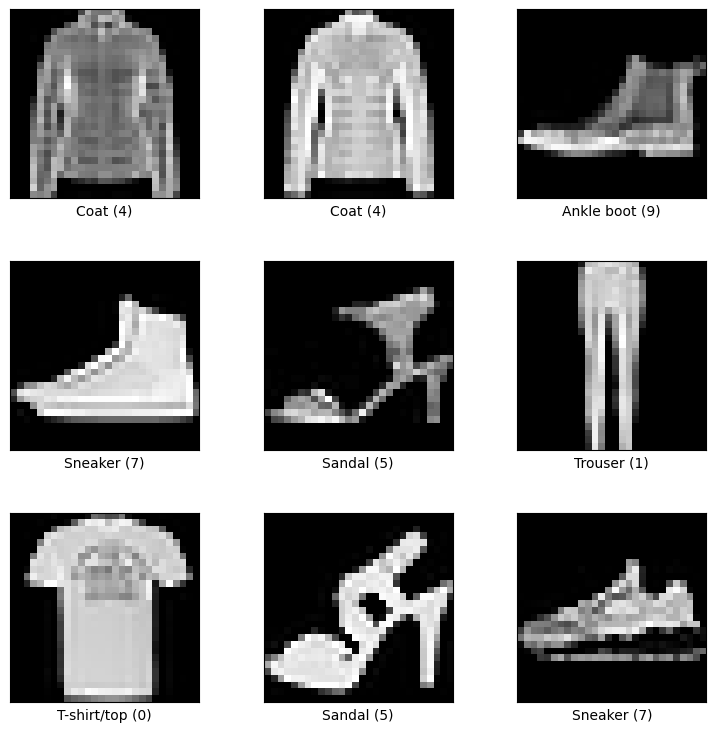

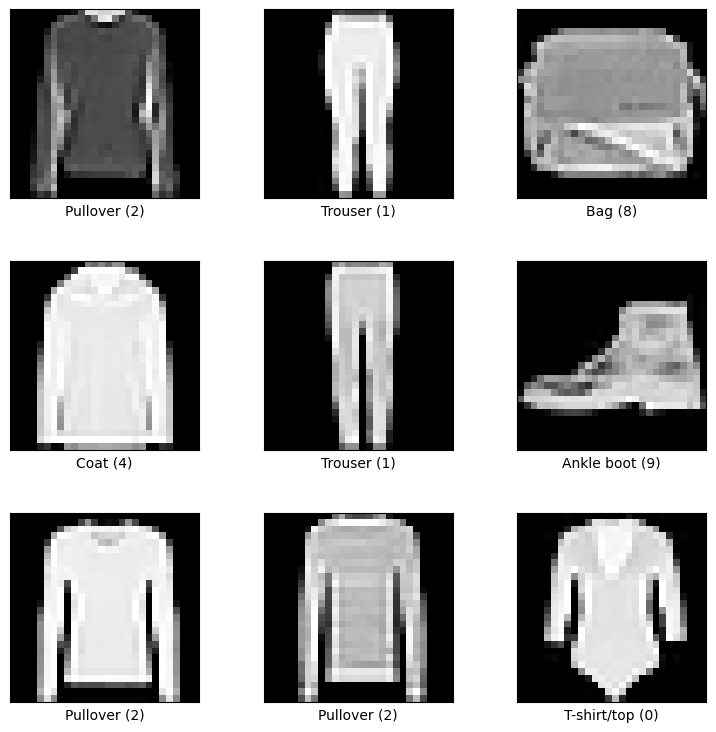

In [26]:
#your code here
fig = tfds.show_examples(dataTest, info)
fig = tfds.show_examples(dataTrain, info)

In [27]:
#this code will not show any output. it will only change the pixel dimension from 0 to 255 to 0 to 1.
#nomalization function
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

dataTrain_1 = dataTrain.map(
     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
dataTrain_1 = dataTrain_1.cache()
# dataTrain_1 = dataTrain_1.shuffle(info.splits['train'].num_examples)
dataTrain_1 = dataTrain_1.batch(64)
dataTrain_1 = dataTrain_1.prefetch(tf.data.AUTOTUNE)

dataTest_1 = dataTest.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
dataTest_1 = dataTest_1.batch(64)
dataTest_1 = dataTest_1.prefetch(tf.data.AUTOTUNE)



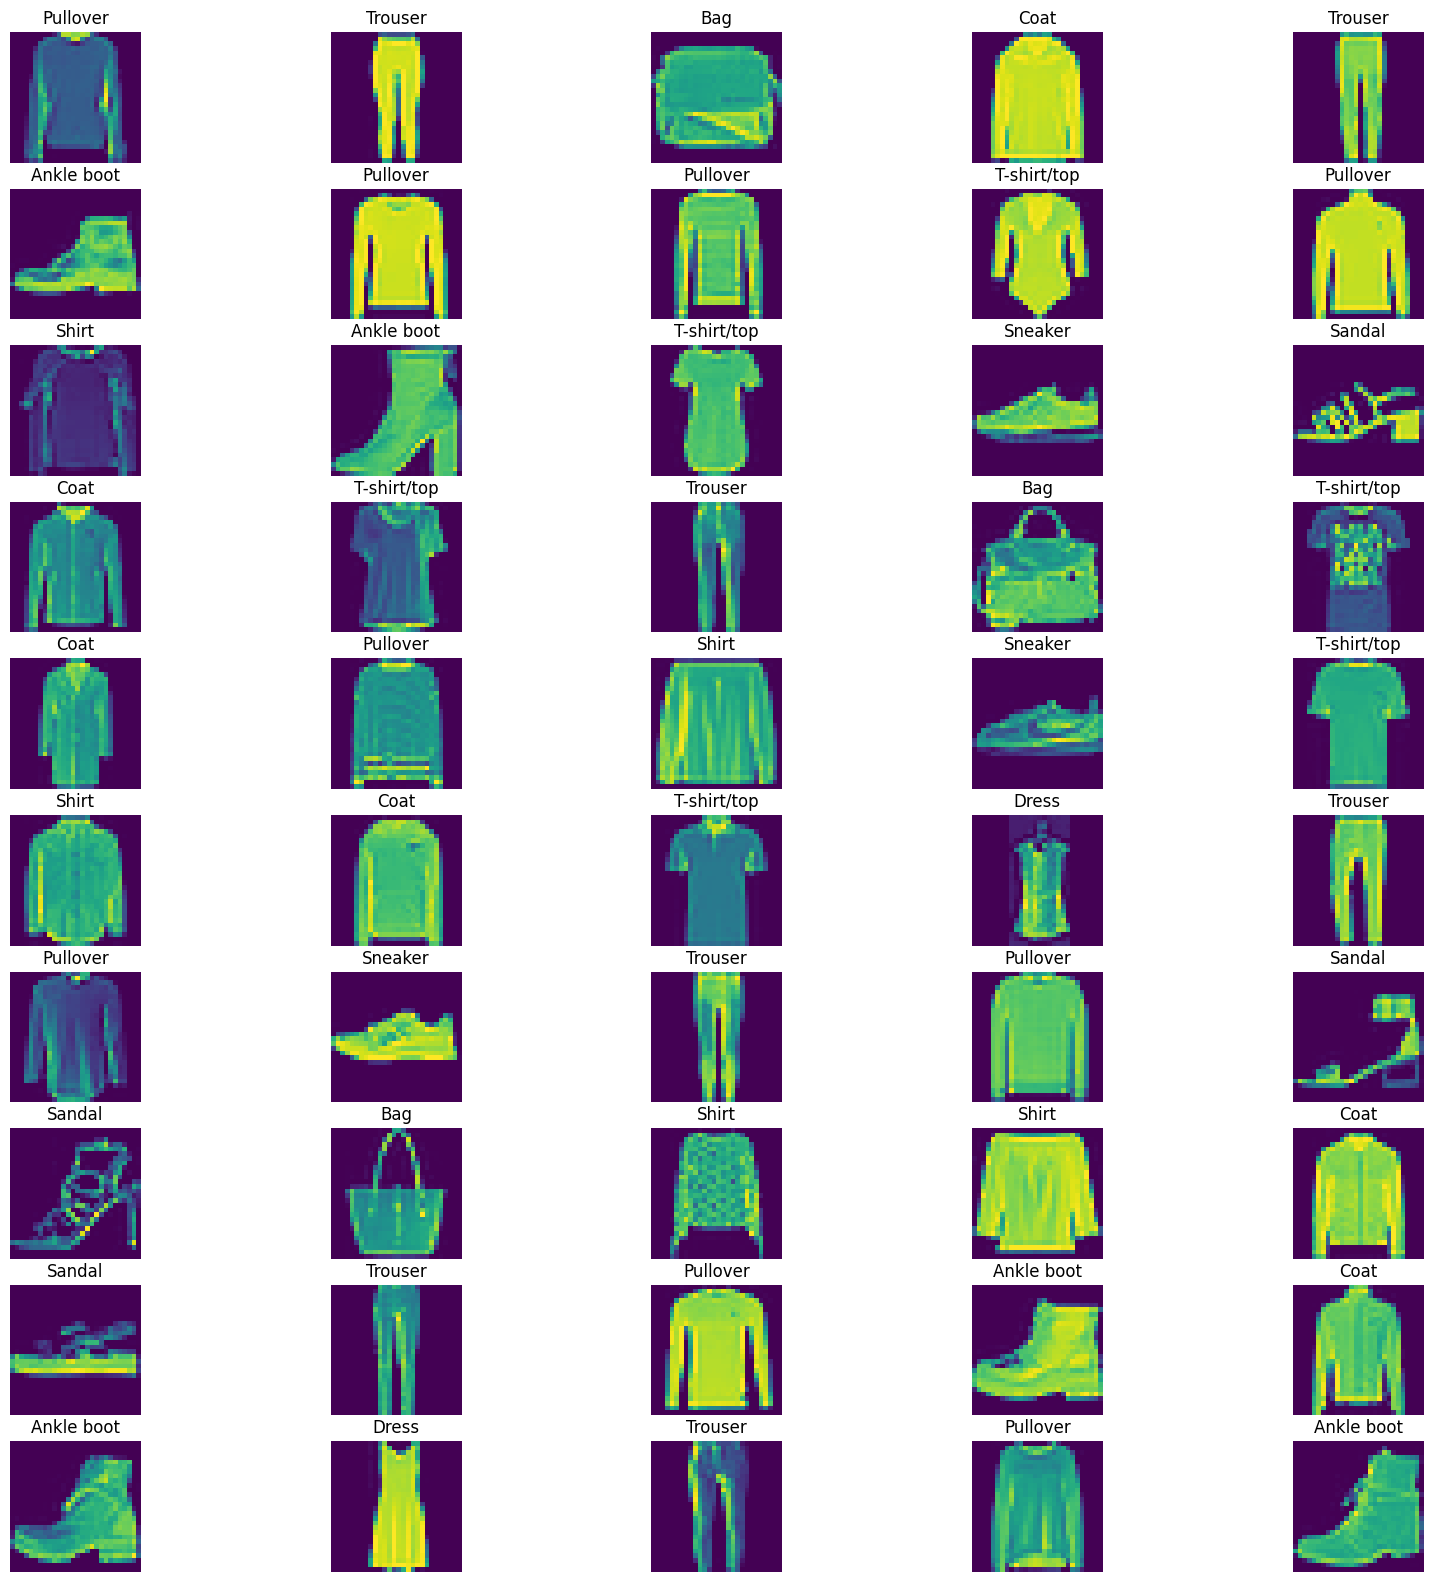

In [28]:
#print atleast 50 images from dataset with their class names.

class_names=info.features['label'].names
plt.figure(figsize=(20, 20))
for images,labels in dataTrain_1.take(1):
    for i in range(50):
     ax=plt.subplot(10,5,i+1)
     plt.title(class_names[labels[i].numpy()])
     plt.imshow(images[i].numpy())
     plt.axis("off")


In [29]:
reg = ak.ImageClassifier(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    max_trials = 1, 
    metrics = 'accuracy'
)
# Train the model and store the training history
history = reg.fit(dataTrain_1, batch_size=64, epochs=10, validation_data=dataTest_1)

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.4503 - accuracy: 0.8389 - val_loss: 0.3314 - val_accuracy: 0.8846
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3190 - accuracy: 0.8857 - val_loss: 0.2830 - val_accuracy: 0.8989
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2868 - accuracy: 0.8969 - val_loss: 0.2735 - val_accuracy: 0.9041
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2614 - accuracy: 0.9055 - val_loss: 0.2551 - val_accuracy: 0.9091
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2464 - accuracy: 0.9103 - val_loss: 0.2455 - val_accuracy: 0.9137
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2340 - accuracy: 0.9152 - val_loss: 0.2383 - val_accuracy: 0.9158
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2231 - accuracy: 0.9194 - val_loss: 0.2366 - val_accuracy: 0.9156
Epoc

In [30]:
plt.show()

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [32]:
import numpy as np

print(np.isnan(history.history['accuracy']))

[False False False False False False False False False False]


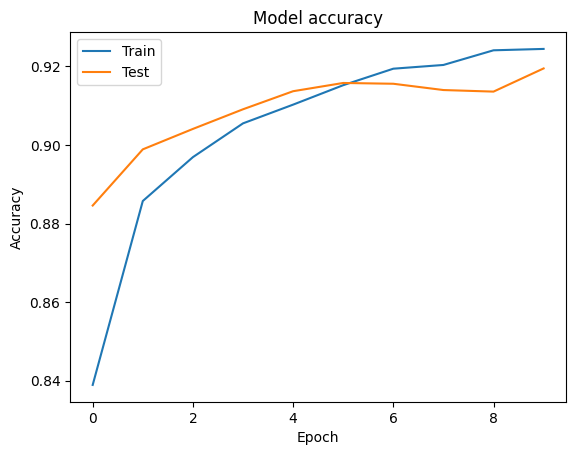

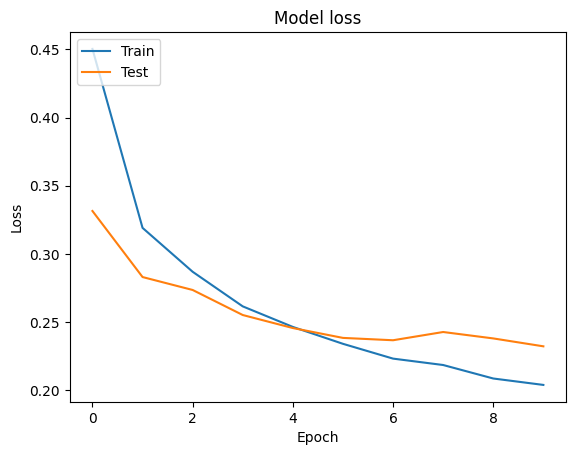

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()